In [39]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

In [16]:
data_co2 = pd.read_csv('Data/Footprint/bristol_CO2_data', encoding='latin-1').set_index('LSOA')
data_lsoa = gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_code')
data_cen = pd.read_csv('Data/Census/age_data.csv')

In [17]:
spatial_data = lsoa_data.join(data_co2, how='right')

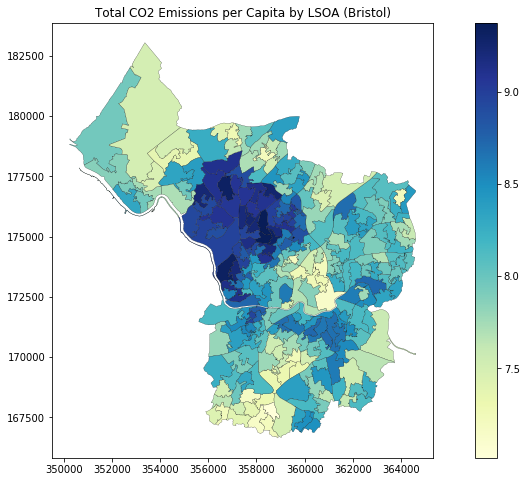

In [24]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

spatial_data.plot(ax=ax,
                  column='TOTAL', 
                  cmap='YlGnBu',
                  linewidth=0.2, edgecolor='black', 
                  legend=True
                 )\
            .set_title("Total CO2 Emissions per Capita by LSOA (Bristol)")

plt.savefig('Outputs/total_co2.png')

In [19]:
food = ['Bread_rice_and_cereals', 'Pasta_products', 'Buns_cakes_biscuits', 'Pastry', 'Beef', 'Pork', 'Lamb', 'Poultry', 'Bacon_and_ham', 'Other_meats', 'Fish_and_fish_products', \
        'Milk', 'Cheese_and_curd', 'Eggs', 'Other_milk_products', 'Butter', 'Margarine', 'Cooking_oils_and_fats', 'Fresh_fruit', 'Other_fresh_fruits', 'Dried_fruit_and_nuts',\
        'Preserved_fruit', 'Fresh_vegetables', 'Dried_vegetables', 'Other_preserved_vegetables', 'Potatoes', 'Other_tubers', 'Sugar', 'Jams', 'Chocolate', 'Confectionery_products',\
        'Edible_ices_and_ice_cream', 'Other_food_products']

In [21]:
data_food = data_co2[food]
data_food['total'] = food_data.sum(axis = 1)

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


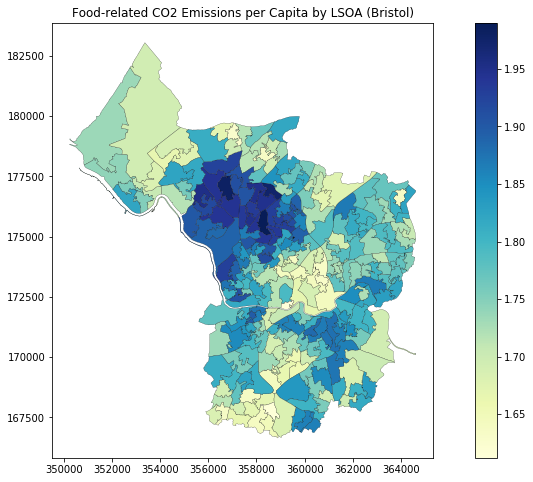

In [23]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

data_lsoa.join(data_food, how='right')\
         .plot(ax=ax,
               column='total', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Food-related CO2 Emissions per Capita by LSOA (Bristol)")

plt.savefig('Outputs/food_co2.png')

### Clustering

In [60]:
data_food = data_food.drop('total', axis=1)

In [77]:
food = ['Bread_rice_and_cereals', 'Pasta_products', 'Buns_cakes_biscuits', 'Pastry', 'Beef', 'Pork', 'Lamb', 'Poultry', 'Bacon_and_ham', 'Other_meats', 'Fish_and_fish_products', \
        'Milk', 'Cheese_and_curd', 'Eggs', 'Other_milk_products', 'Butter', 'Margarine', 'Cooking_oils_and_fats', 'Fresh_fruit', 'Other_fresh_fruits', 'Dried_fruit_and_nuts',\
        'Preserved_fruit', 'Fresh_vegetables', 'Dried_vegetables', 'Other_preserved_vegetables', 'Potatoes', 'Other_tubers', 'Sugar', 'Jams', 'Chocolate', 'Confectionery_products',\
        'Edible_ices_and_ice_cream', 'Other_food_products']

grains = ['Bread_rice_and_cereals', 'Pasta_products', 'Buns_cakes_biscuits', 'Pastry']
meat = ['Beef', 'Pork', 'Lamb', 'Poultry', 'Bacon_and_ham', 'Other_meats', 'Fish_and_fish_products']
dairy_eggs = ['Milk', 'Cheese_and_curd', 'Eggs', 'Other_milk_products', 'Butter']
fats = ['Margarine', 'Cooking_oils_and_fats']
fruit_veg = ['Fresh_fruit', 'Other_fresh_fruits', 'Dried_fruit_and_nuts', 'Preserved_fruit', 'Fresh_vegetables', 'Dried_vegetables', 'Other_preserved_vegetables', 'Potatoes', 'Other_tubers']
sweets_other = ['Sugar', 'Jams', 'Chocolate', 'Confectionery_products', 'Edible_ices_and_ice_cream', 'Other_food_products']

In [78]:
data_food['total_grains'] = data_food[grains].sum(axis=1)
data_food['total_meat'] = data_food[meat].sum(axis=1)
data_food['total_dairy_eggs'] = data_food[dairy_eggs].sum(axis=1)
data_food['total_fats'] = data_food[fats].sum(axis=1)
data_food['total_fruit_veg'] = data_food[fruit_veg].sum(axis=1)
data_food['total_sweets_other'] = data_food[sweets_other].sum(axis=1)

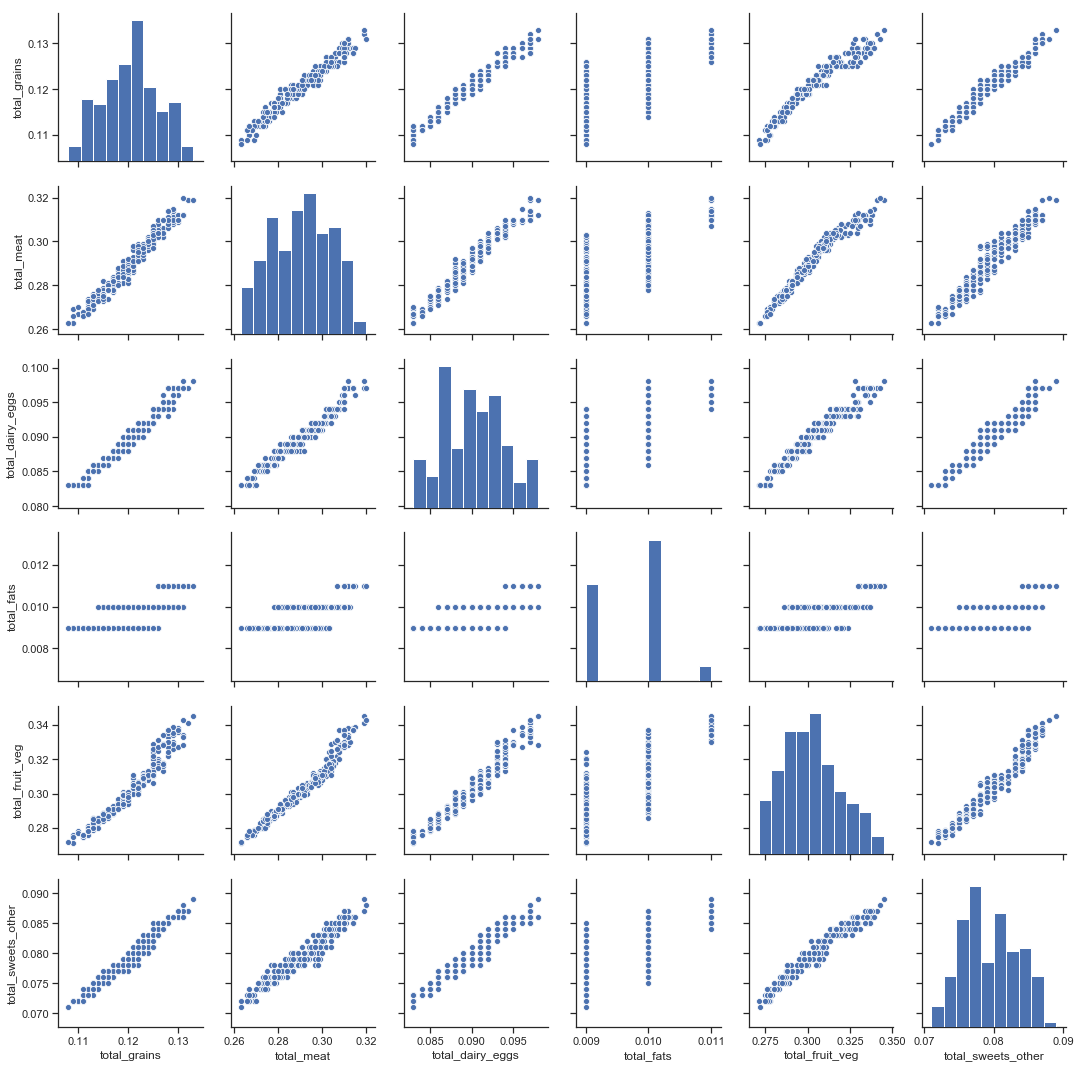

In [79]:
sns.set(style="ticks")
sns.pairplot(data_food.iloc[:,-6:])

# NEED TO STANDARDISE TO DO K-MEANS

--> can use k-means to find clusters of purchase groups? 

In [80]:
# Perform PCA
pca = PCA(n_components=None) # Create an instance of the PCA class

# Fit the data to the model
pcaResults = pca.fit_transform(data_food.iloc[:,-6:])
pca.explained_variance_ratio_[:5] # Extract the varience

array([9.86573320e-01, 9.13038095e-03, 2.68348785e-03, 8.05980809e-04,
       6.07034475e-04])

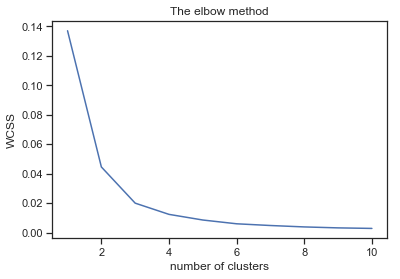

In [81]:
# use the elbow method
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pcaResults)
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS results
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
km2 = cluster.KMeans(n_clusters=2)

np.random.seed(1234) # seed to ensure that analysis can be replicated
k2cls = km2.fit(data_food.iloc[:,-6:])

# an array with the clusters assigned to each datapoint
k2cls.labels_

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
# Perform PCA using 2 components
pca = PCA(n_components = 2).fit_transform(data_food.iloc[:,-6:])

# perform k-means on pca (using 2 clusters)
k_pca = cluster.KMeans(n_clusters=2).fit(pca)

In [84]:
colour_map = {
    1 : 'blue',
    0 : 'orange',
}

# Create an array of colours based on the target column
pca_colours = [colour_map[c] for c in k_pca.labels_]
raw_colours = [colour_map[c] for c in k2cls.labels_]

Text(0, 0.5, 'PC2')

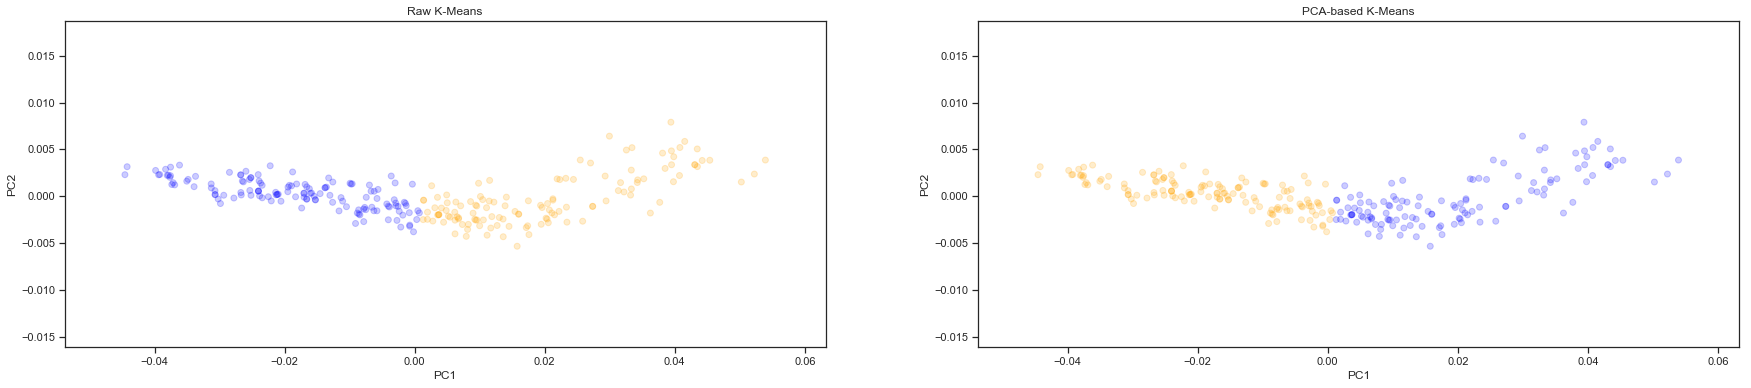

In [85]:
k_pca = cluster.KMeans(n_clusters=2).fit(pca)

f, axs = plt.subplots(1, 2, figsize=(30, 6))

axs[0].scatter(pca[:, 0], pca[:, 1], 
               c=raw_colours,
               alpha=0.2);
axs[0].set_title('Raw K-Means')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

axs[1].scatter(pca[:, 0], pca[:, 1], 
               c=pca_colours,
               alpha=0.2);
axs[1].set_title('PCA-based K-Means')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
